In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from matplotlib.dates import DateFormatter

In [2]:
%ls

CustomerAddress_cleaned.csv
CustomerDemo_cleaned.csv
KPMG Task 1 - Customer Address .ipynb
KPMG Task 1 - Customer Demographic Table.ipynb
KPMG Task 1 - New Customers Table.ipynb
KPMG Task 1 - Transactions Table.ipynb
KPMG Task 1 Sample ANS .docx
KPMG Task 1.docx
KPMG Task 2.ipynb
KPMG_VI_New_raw_data_update_final.xlsx
Module_2_Template_slide.pptx
Transactions_cleaned.csv
~$KPMG_VI_New_raw_data_update_final.xlsx


In [3]:
address_df = pd.read_csv('CustomerAddress_cleaned.csv')
demo_df = pd.read_csv('CustomerDemo_cleaned.csv')
transactions_df = pd.read_csv('Transactions_cleaned.csv')

In [4]:
address_df.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10


In [5]:
demo_df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,1,11,69.303980,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,1,16,42.124777,40


In [6]:
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Last_Purchase_Days,Profit
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,308.0,17.87
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,223.0,1702.55


In [7]:
DemoAddr = pd.merge(demo_df, address_df, left_index=True, right_index=True)
DemoAddr = DemoAddr.dropna()

In [8]:
DemoAddr.head(3)

,customer_id_x,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_group,customer_id_y,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,1,11,69.303980,70,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,1,16,42.124777,40,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,1,15,69.030190,70,4,0 Holy Cross Court,4211,QLD,Australia,9


<AxesSubplot:xlabel='age_group'>

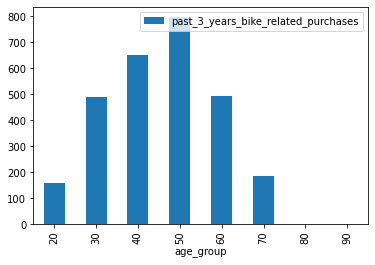

In [10]:
DemoAddr.groupby('age_group').agg('past_3_years_bike_related_purchases').count().to_frame().plot(kind='bar')

<AxesSubplot:xlabel='job_industry_category'>

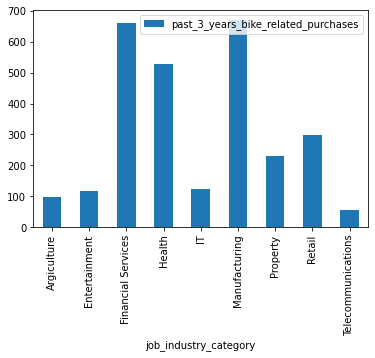

In [11]:
DemoAddr.groupby('job_industry_category').agg('past_3_years_bike_related_purchases').count().to_frame().plot(kind='bar')

<AxesSubplot:xlabel='job_industry_category'>

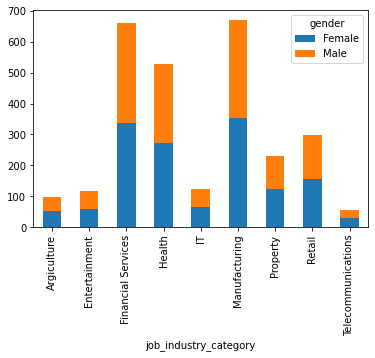

In [12]:
DemoAddr.groupby('job_industry_category')['gender'].value_counts().unstack(level=1).plot.bar(stacked=True)

<AxesSubplot:xlabel='wealth_segment'>

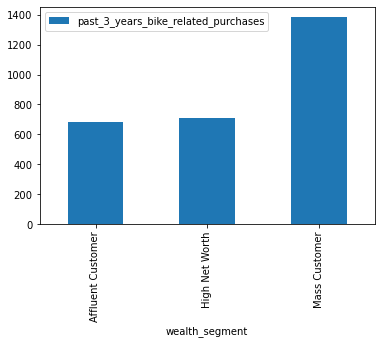

In [13]:
DemoAddr.groupby('wealth_segment').agg('past_3_years_bike_related_purchases').count().to_frame().plot(kind='bar')

<AxesSubplot:xlabel='owns_car'>

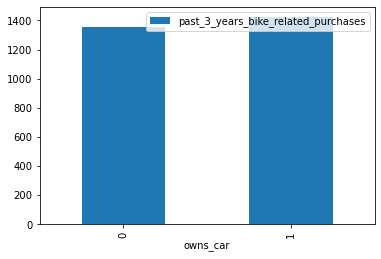

In [14]:
DemoAddr.groupby('owns_car').agg('past_3_years_bike_related_purchases').count().to_frame().plot(kind='bar')

<AxesSubplot:xlabel='state'>

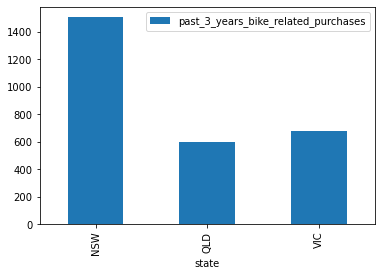

In [15]:
DemoAddr.groupby('state').agg('past_3_years_bike_related_purchases').count().to_frame().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

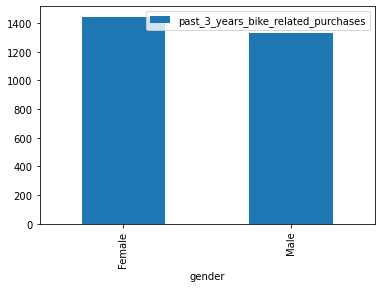

In [16]:
DemoAddr.groupby('gender').agg('past_3_years_bike_related_purchases').count().to_frame().plot(kind='bar')